# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [1]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.reporting.figures import PortfolioPlot
from surfingcrypto.reporting.figures import CalendarPlot

import pandas as pd

In [2]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [3]:
p = Portfolio("coinbase", configuration=c)



### PORTFOLIO 
MyCoinbase( isHistoric:True, N_accounts:32)
Warning! There are 14 transactionsthat were EXCLUDED in std_df.
Warning! Errors while handling transactions:
TransactionsHistory(Transactions:203 - Processed:203, Unhandled:0 - Errors:9)


In [4]:
p.coinbase.active_accounts


['DOGE', 'SOL', 'MATIC', 'USDC']

In [5]:
p.std_df.head()


type      amount symbol  native_amount nat_symbol  \
datetime                                                                  
2018-10-22T06:29:22Z   buy    0.017237    BTC         100.00        EUR   
2018-11-09T12:05:12Z  sell    0.017237    BTC          93.27        EUR   
2018-11-09T12:06:14Z   buy  348.021666    BAT          93.27        EUR   
2019-01-25T14:28:56Z  sell  348.021666    BAT          35.96        EUR   
2021-04-20T18:57:40Z   buy    0.258429    ETH         500.00        EUR   

                       total  subtotal  total_fee   spot_price  \
datetime                                                         
2018-10-22T06:29:22Z  100.00     97.01       2.99  5627.999719   
2018-11-09T12:05:12Z   93.27     96.26       2.99  5584.488743   
2018-11-09T12:06:14Z   93.27     90.28       2.99     0.259409   
2019-01-25T14:28:56Z   35.96     37.95       1.99     0.109045   
2021-04-20T18:57:40Z  500.00    492.66       7.34  1906.364408   

                                            transaction_id  \
datetime                                                     
2018-10-22T06:29:22Z  e1c9a69b-7b83-5cbc-831e-de11458a276c   
2018-11-09T12:05:12Z  ac53f2e0-98da-51b2-b44a-cc576d6674f4   
2018-11-09T12:06:14Z  51726c10-2841-56e6-97e3-3119494fe2a0   
2019-01-25T14:28:56Z  79de6093-a023-5075-a0eb-57c304ab8657   
2021-04-20T18:57:40Z  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6   

                                       transaction_type_id  
datetime                                                    
2018-10-22T06:29:22Z  17dad4f5-a677-53e1-a2e8-e5bf2968a7d1  
2018-11-09T12:05:12Z  6b48ecd7-a0d6-56df-bc23-84aac4ca1bb1  
2018-11-09T12:06:14Z  222e2c94-d9a3-5d8c-871c-ba31471278b2  
2019-01-25T14:28:56Z  7871d80e-963f-516c-ba9d-135bb80d2abf  
2021-04-20T18:57:40Z  5c5fa053-34ce-5b18-a991-05ab63f3ed08

## Total fees

In [6]:
p.total_fees()


221.59999999999988

## Portfolio total investment`

Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [7]:
p.total_investment()



amount
type                    
fiat_deposit     1050.00
fiat_withdrawal   -35.96

## Portfolio value tracker

In [8]:
p.start_tracker(
    stocks_start="1-1-2021", benchmark="ETH",
)



### Closedata

`Tracker` uses locally stored closedata to track the portfolio daily values.

In [9]:
p.tracker.closedata.tail()


Date     Close symbol
12797 2022-04-14 00:00:00+00:00  0.132988   DOGE
12798 2022-04-15 00:00:00+00:00  0.135061   DOGE
12799 2022-04-16 00:00:00+00:00  0.132920   DOGE
12800 2022-04-17 00:00:00+00:00  0.128967   DOGE
12801 2022-04-18 00:00:00+00:00  0.130127   DOGE

The  `error_log` attributes contains the log from loading data.

In [10]:
p.tracker.error_log


[]

### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [11]:
p.tracker.active_positions.head()


Open date  Type         Qty Symbol  Adj cost  \
4 2021-04-20 18:57:40+00:00   buy    0.258429    ETH    500.00   
5 2021-04-22 10:13:53+00:00   buy    0.062128    MKR    250.00   
6 2021-04-22 19:20:15+00:00  sell    0.062128    MKR    213.69   
7 2021-04-24 08:53:47+00:00   buy  210.343863    ADA    213.69   
8 2021-04-25 16:15:33+00:00   buy    0.350116   CGLD      1.65   

   Adj cost per share                        transaction_id  
4         1906.364408  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6  
5         3964.873854  13eeda10-e6c0-51d6-a799-54a399840255  
6         3491.496921  576000a6-1904-5f54-97a3-ade4ccc9b916  
7            1.000980  332111be-8e28-5611-bb83-cb007f24c2f6  
8            4.712730  c1c24d9e-966c-5cf9-a0cc-b79a68dfcbcb

### Portfolio calculations

All `daily_snapshots` are concatenated in a single dataframe, where for each row the following new attributes are calculated:

- Symbol Adj Close	    
- Adj cost daily	
- Benchmark Close	
- Benchmark DayOfBuy Close	
- Benchmark Equiv Shares	
- Benchmark Adj Cost Daily	
- symbol Return	
- Stock Gain / (Loss)	
- Benchmark Return	
- Benchmark Gain / (Loss)

In [12]:
p.tracker.daily_calcs

Open date Type          Qty Symbol  Adj cost  \
0    2021-04-20 18:57:40+00:00  buy     0.258429    ETH    500.00   
1    2021-04-20 18:57:40+00:00  buy     0.258429    ETH    500.00   
2    2021-04-20 18:57:40+00:00  buy     0.258429    ETH    500.00   
3    2021-04-20 18:57:40+00:00  buy     0.258429    ETH    500.00   
4    2021-04-20 18:57:40+00:00  buy     0.258429    ETH    500.00   
...                        ...  ...          ...    ...       ...   
1795 2022-04-13 22:45:23+00:00  buy  4693.928869   DOGE    604.11   
1796 2022-04-11 21:35:11+00:00  buy     0.006639   USDC    143.41   
1797 2021-08-26 19:45:55+00:00  buy   257.829804  MATIC   1360.65   
1798 2022-04-13 21:13:35+00:00  buy     1.228168    SOL    118.00   
1799 2022-04-13 22:45:23+00:00  buy  4693.928869   DOGE    604.11   

      Adj cost per share                        transaction_id  \
0            1906.364408  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6   
1            1906.364408  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6   
2            1906.364408  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6   
3            1906.364408  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6   
4            1906.364408  e07fd026-c7f2-56e9-990a-a1c5af3a6ba6   
...                  ...                                   ...   
1795            0.128700  c702a177-e621-5eb9-84ca-ee4db88bc755   
1796            0.918329  03bdcb79-0bc1-597f-89c8-c4f444e811c1   
1797            1.174154  eb373ce7-462b-5b42-9494-03bf322fa5af   
1798           96.078047  d4e078a5-cafa-5263-ba88-46c8cfd0df55   
1799            0.128700  c702a177-e621-5eb9-84ca-ee4db88bc755   

                 Date Snapshot  Symbol Adj Close  Adj cost daily  \
0    2021-04-20 00:00:00+00:00       1936.596366      500.472817   
1    2021-04-21 00:00:00+00:00       1964.593249      507.708026   
2    2021-04-22 00:00:00+00:00       2000.536891      516.996908   
3    2021-04-23 00:00:00+00:00       1953.619811      504.872170   
4    2021-04-24 00:00:00+00:00       1828.220570      472.465360   
...                        ...               ...             ...   
1795 2022-04-17 00:00:00+00:00          0.128967      605.364206   
1796 2022-04-18 00:00:00+00:00          0.927471        0.006157   
1797 2022-04-18 00:00:00+00:00          1.318247      339.883474   
1798 2022-04-18 00:00:00+00:00         94.761133      116.382608   
1799 2022-04-18 00:00:00+00:00          0.130127      610.808951   

      Benchmark Close  Benchmark DayOfBuy Close  Benchmark Equiv Shares  \
0         1936.596366               1936.596366                0.258185   
1         1964.593249               1936.596366                0.258185   
2         2000.536891               1936.596366                0.258185   
3         1953.619811               1936.596366                0.258185   
4         1828.220570               1936.596366                0.258185   
...               ...                       ...                     ...   
1795      2768.209553               2862.116169                0.211071   
1796      2836.202356               2740.696028                0.052326   
1797      2836.202356               2637.787884                0.515830   
1798      2836.202356               2862.116169                0.041228   
1799      2836.202356               2862.116169                0.211071   

      Benchmark Adj Cost Daily  symbol Return  Stock Gain / (Loss)  \
0                   500.000000       0.015858             7.812817   
1                   507.228373       0.030544            15.048026   
2                   516.508480       0.049399            24.336908   
3                   504.395197       0.024788            12.212170   
4                   472.019002      -0.040991           -20.194640   
...                        ...            ...                  ...   
1795                584.289028       0.002076             1.254206   
1796                148.407476       0.009955             0.000061   
1797               1462.998128       0.122721      

### Daily snapshots

The module produces daily snapshots of the portfolio balance.
Each day can be accessed by selecting via the `Date Snapshot` column.

Either select a specifici day by specifing it with a string in `d-m-Y` forma or use `last` to get the last available snapshot.


In [13]:
p.tracker.daily_snaphost("last")


Open date Type          Qty Symbol  \
Date Snapshot                                                                  
2022-04-18 00:00:00+00:00 2022-04-11 21:35:11+00:00  buy     0.006639   USDC   
2022-04-18 00:00:00+00:00 2021-08-26 19:45:55+00:00  buy   257.829804  MATIC   
2022-04-18 00:00:00+00:00 2022-04-13 21:13:35+00:00  buy     1.228168    SOL   
2022-04-18 00:00:00+00:00 2022-04-13 22:45:23+00:00  buy  4693.928869   DOGE   

                           Adj cost  Adj cost per share  \
Date Snapshot                                             
2022-04-18 00:00:00+00:00    143.41            0.918329   
2022-04-18 00:00:00+00:00   1360.65            1.174154   
2022-04-18 00:00:00+00:00    118.00           96.078047   
2022-04-18 00:00:00+00:00    604.11            0.128700   

                                                 transaction_id  \
Date Snapshot                                                     
2022-04-18 00:00:00+00:00  03bdcb79-0bc1-597f-89c8-c4f444e811c1   
2022-04-18 00:00:00+00:00  eb373ce7-462b-5b42-9494-03bf322fa5af   
2022-04-18 00:00:00+00:00  d4e078a5-cafa-5263-ba88-46c8cfd0df55   
2022-04-18 00:00:00+00:00  c702a177-e621-5eb9-84ca-ee4db88bc755   

                           Symbol Adj Close  Adj cost daily  Benchmark Close  \
Date Snapshot                                                                  
2022-04-18 00:00:00+00:00          0.927471        0.006157      2836.202356   
2022-04-18 00:00:00+00:00          1.318247      339.883474      2836.202356   
2022-04-18 00:00:00+00:00         94.761133      116.382608      2836.202356   
2022-04-18 00:00:00+00:00          0.130127      610.808951      2836.202356   

                           Benchmark DayOfBuy Close  Benchmark Equiv Shares  \
Date Snapshot                                                                 
2022-04-18 00:00:00+00:00               2740.696028                0.052326   
2022-04-18 00:00:00+00:00               2637.787884                0.515830   
2022-04-18 00:00:00+00:00               2862.116169                0.041228   
2022-04-18 00:00:00+00:00               2862.116169                0.211071   

                           Benchmark Adj Cost Daily  symbol Return  \
Date Snapshot                                                        
2022-04-18 00:00:00+00:00                148.407476       0.009955   
2022-04-18 00:00:00+00:00               1462.998128       0.122721   
2022-04-18 00:00:00+00:00                116.931619      -0.013707   
2022-04-18 00:00:00+00:00                598.640343       0.011089   

                           Stock Gain / (Loss)  Benchmark Return  \
Date Snapshot                                                      
2022-04-18 00:00:00+00:00             0.000061          0.034847   
2022-04-18 00:00:00+00:00            37.151561          0.075220   
2022-04-18 00:00:00+00:00            -1.617392         -0.009054   
2022-04-18 00:00:00+00:00             6.698951         -0.009054   

                           Benchmark Gain / (Loss)  
Date Snapshot                                       
2022-04-18 00:00:00+00:00                 4.997476  
2022-04-18 00:00:00+00:00               102.348128  
2022-04-18 00:00:00+00:00                -1.068381  
2022-04-18 00:00:00+00:00                -5.469657

### Live snapshots

Get the live snapshot of the portfolio.

At the moment it does not feature updating benchmark calcs.


In [14]:
p.live_snapshot()

Open date Type          Qty Symbol  \
Date Snapshot                                                                  
2022-04-18 00:00:00+00:00 2022-04-11 21:35:11+00:00  buy     0.006639   USDC   
2022-04-18 00:00:00+00:00 2021-08-26 19:45:55+00:00  buy   257.829804  MATIC   
2022-04-18 00:00:00+00:00 2022-04-13 21:13:35+00:00  buy     1.228168    SOL   
2022-04-18 00:00:00+00:00 2022-04-13 22:45:23+00:00  buy  4693.928869   DOGE   

                           Adj cost  Adj cost per share  \
Date Snapshot                                             
2022-04-18 00:00:00+00:00    143.41            0.918329   
2022-04-18 00:00:00+00:00   1360.65            1.174154   
2022-04-18 00:00:00+00:00    118.00           96.078047   
2022-04-18 00:00:00+00:00    604.11            0.128700   

                                                 transaction_id  \
Date Snapshot                                                     
2022-04-18 00:00:00+00:00  03bdcb79-0bc1-597f-89c8-c4f444e811c1   
2022-04-18 00:00:00+00:00  eb373ce7-462b-5b42-9494-03bf322fa5af   
2022-04-18 00:00:00+00:00  d4e078a5-cafa-5263-ba88-46c8cfd0df55   
2022-04-18 00:00:00+00:00  c702a177-e621-5eb9-84ca-ee4db88bc755   

                           Symbol Adj Close  Adj cost daily  symbol Return  \
Date Snapshot                                                                
2022-04-18 00:00:00+00:00          0.926847        0.006153       0.009276   
2022-04-18 00:00:00+00:00          1.308400      337.344516       0.114334   
2022-04-18 00:00:00+00:00         99.710000      122.460649       0.037802   
2022-04-18 00:00:00+00:00          0.131100      615.374075       0.018646   

                           Stock Gain / (Loss)  
Date Snapshot                                   
2022-04-18 00:00:00+00:00             0.000057  
2022-04-18 00:00:00+00:00            34.612602  
2022-04-18 00:00:00+00:00             4.460649  
2022-04-18 00:00:00+00:00            11.264075

### Daily grouped metrics

The `daily_grouped_metrics()` method can be used to extract from the `daily_calcs` dataframe a single grouped timeseries of a selecred set of variables.

In [15]:
p.tracker.daily_grouped_metrics(["Adj cost daily"]).tail()



variable       Adj cost daily
Date Snapshot                
2022-04-14        1065.558023
2022-04-15        1082.056010
2022-04-16        1071.776866
2022-04-17        1038.931152
2022-04-18        1067.081190

By default all different assets are summed together, otherwise it is possible to keep data separated by simbol, with `by_simbol` set as `True`.

In [16]:
p.tracker.daily_grouped_metrics(["Adj cost daily"], by_symbol=True).iloc[-5:].dropna(
    axis=1
)



Symbol                  DOGE          MATIC            SOL           USDC
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily
Date Snapshot                                                            
2022-04-14        624.235972     327.024998     114.290919       0.006134
2022-04-15        633.965278     333.002630     115.081963       0.006139
2022-04-16        623.918862     331.693553     116.158309       0.006142
2022-04-17        605.364206     319.518181     114.042630       0.006135
2022-04-18        610.808951     339.883474     116.382608       0.006157

Since `variables` is a list, we can compare multiple attributes.

In [17]:
df = p.tracker.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)", "Stock Gain / (Loss)"], by_symbol=True
)
df.tail()


Symbol                           AAVE                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   
2022-04-18                        NaN                 NaN   

Symbol                            ACH                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   
2022-04-18                        NaN                 NaN   

Symbol                            ADA                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   
2022-04-18                        NaN                 NaN   

Symbol                           ALGO                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   
2022-04-18                        NaN                 NaN   

Symbol                            AMP                      ...  \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-04-14                        NaN                 NaN  ...   
2022-04-15                        NaN                 NaN  ...   
2022-04-16                        NaN                 NaN  ...   
2022-04-17                        NaN                 NaN  ...   
2022-04-18                        NaN                 NaN  ...   

Symbol                            SOL                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                  -2.951900           -3.709081   
2022-04-15                  -2.042907           -2.918037   
2022-04-16                  -1.227111           -1.841691   
2022-04-17                  -3.871604           -3.957370   
2022-04-18                  -1.068381           -1.617392   

Symbol                          SUSHI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   
2022-04-18                        NaN                 NaN   

Symbol                            UNI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   
2022-04-18                        NaN                 NaN   

Symbol                           USDC           

## Portfolio figures

The `surfingcrypto.reporting.figures` modules containes a custom `PortfolioPlot` class that is designed to plot figures for the stock calculation, as *Adj cost daily*  or *Stock Gain / (Loss)*.

Data can be selected by passing the `variable` - and optionally `by_symbol`-  as to a `daily_grouped_metrics()` function. 

Moreover, with `zero_line`as `True` it is possible to add an horizontal line at 0.
### Portfolio daily value 

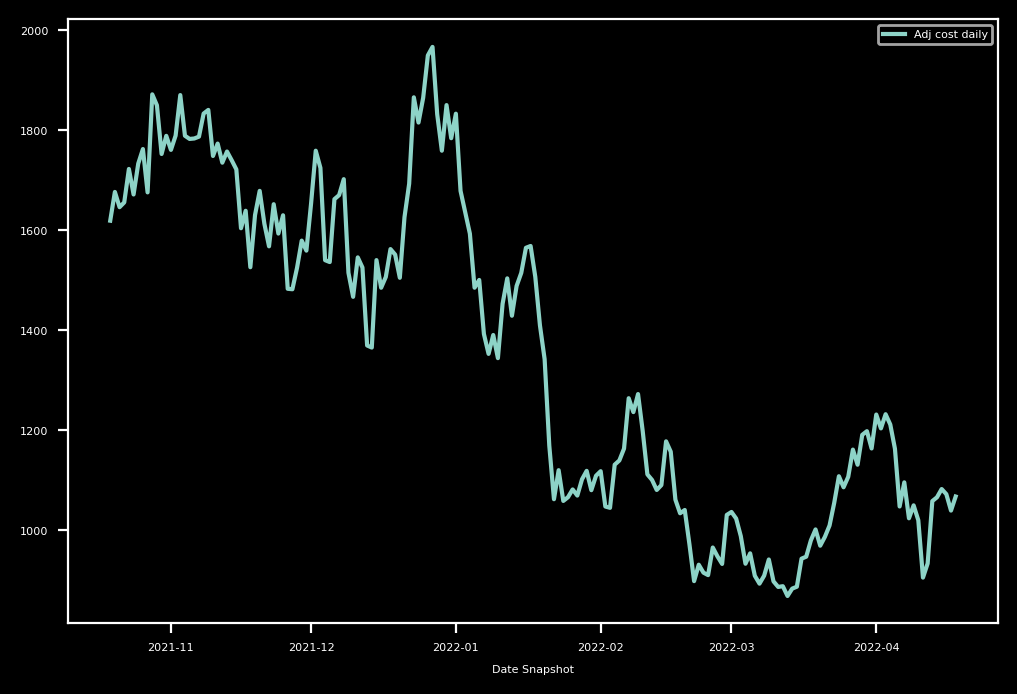

In [18]:
PortfolioPlot(variables=["Adj cost daily"], object=p, graphstart="6m")



### Portfolio gain/loss

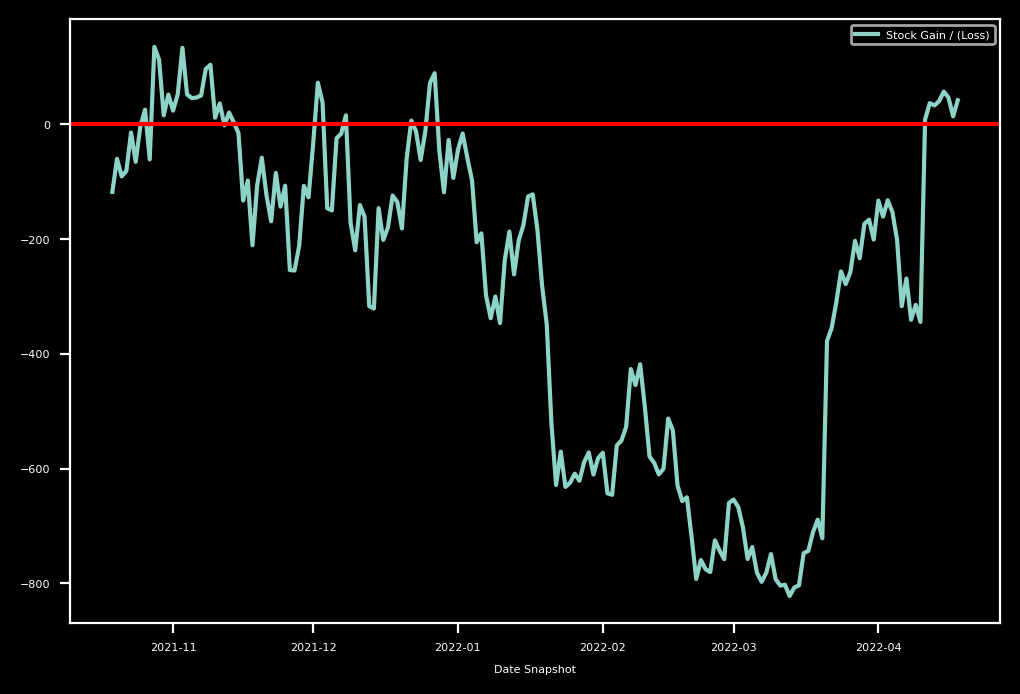

In [19]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



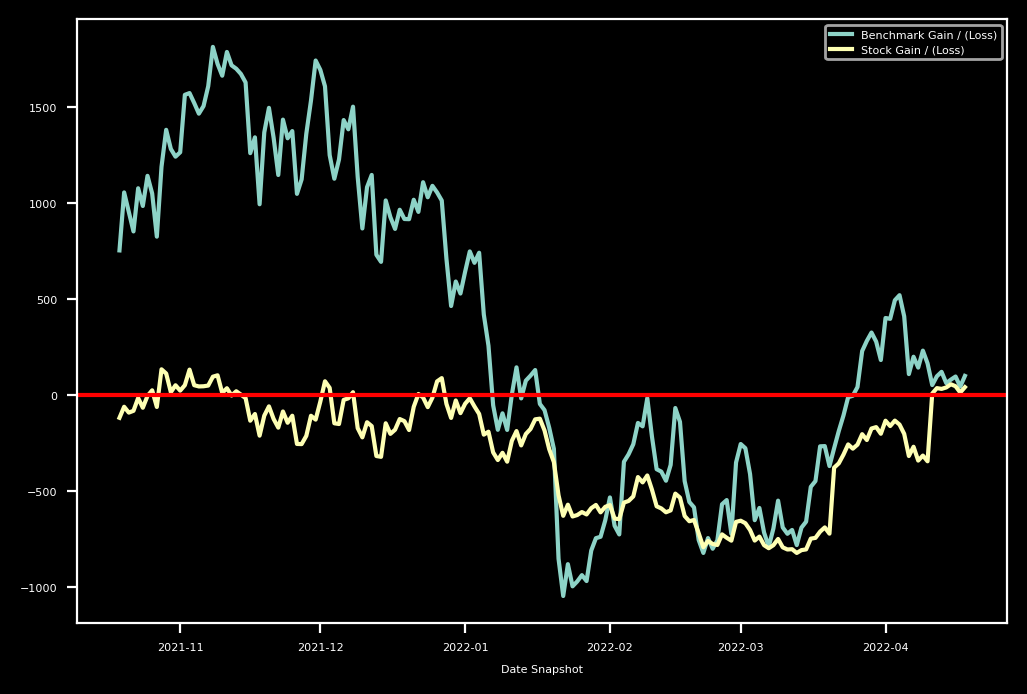

In [20]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)", "Benchmark Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



### Portfolio daily value by symbol


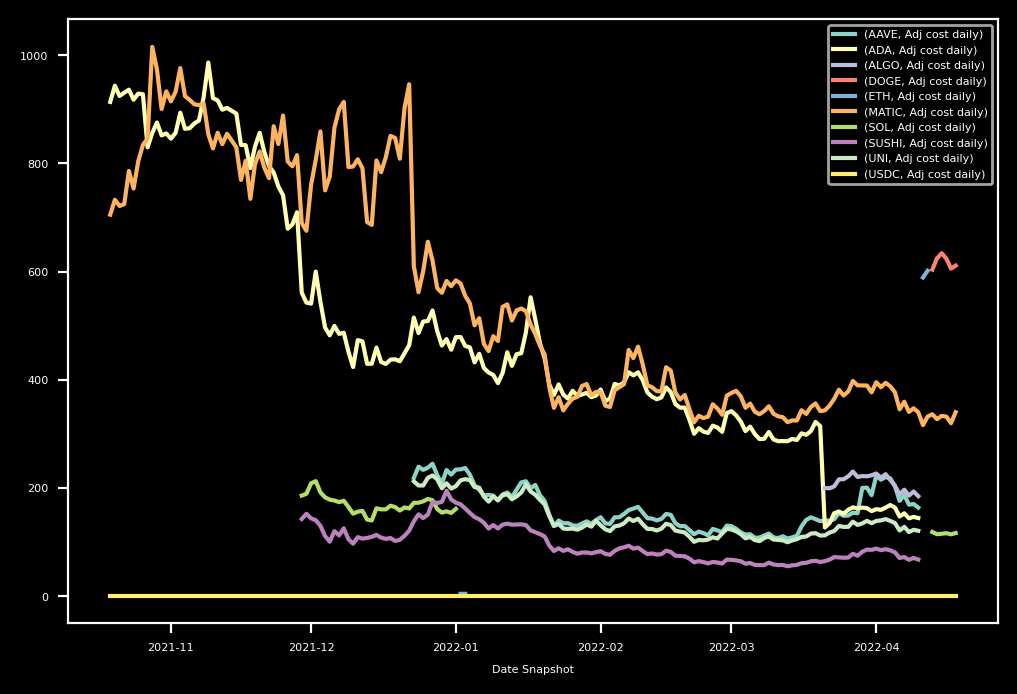

In [21]:
PortfolioPlot(
    variables=["Adj cost daily"], by_symbol=True, object=p, graphstart="6m"
)



### Stock gain by symbol

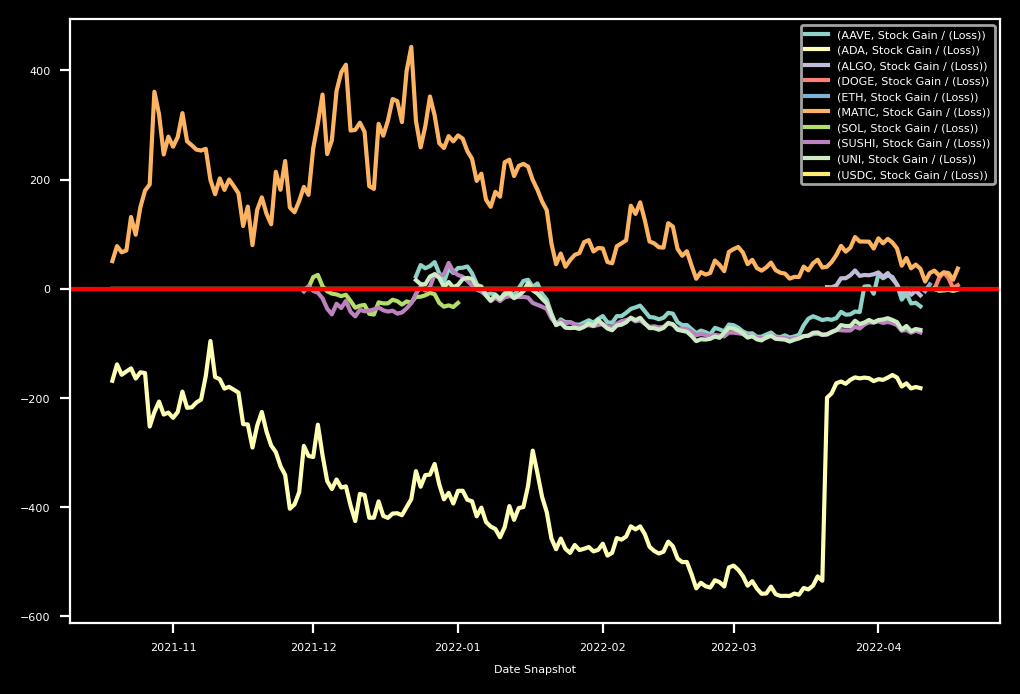

In [22]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    by_symbol=True,
    zero_line=True,
    object=p,
    graphstart="6m",
)


## Calendar plot

This calendar plot is a good visualisation of a variable in a calendar style.

The series passed as input must have a datetime index.


In [23]:
values = p.tracker.daily_grouped_metrics(["Stock Gain / (Loss)"])
values.index = pd.to_datetime(values.index)
values = values.reset_index().set_index("Date Snapshot")
values

variable       Stock Gain / (Loss)
Date Snapshot                     
2021-04-20                7.812817
2021-04-21               15.048026
2021-04-22               24.336908
2021-04-23               12.212170
2021-04-24              -39.242299
...                            ...
2022-04-14               40.710013
2022-04-15               57.208000
2022-04-16               46.928856
2022-04-17               14.083142
2022-04-18               42.233180

[364 rows x 1 columns]

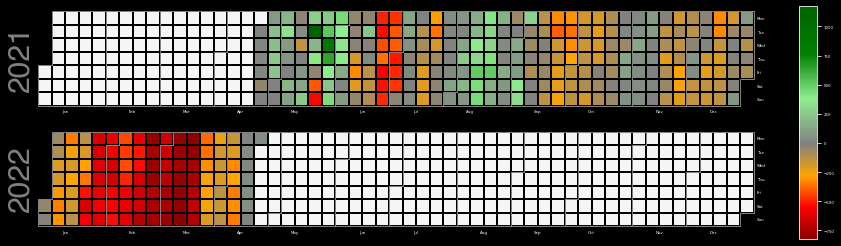

In [24]:
CalendarPlot(values=values)